# Introduction to OMERO (part II)

The pipeline presented here will teach you how to import images from OMERO, retrieve the metadata of an image and then render on the notebook.   
For more details, visit https://docs.openmicroscopy.org/omero/5.4.8/developers/Python.html

## Exercises 1 - Connect to the omero server

In [2]:
# The 2 lines below are there to set the path to the OMERO python client. 
import sys
sys.path.append('../../OMERO.server/lib/python')
from omero.gateway import BlitzGateway
from getpass import getpass

host = "localhost"
port = 4064
username = 'root'

# Use the getpass function to ask the user for the password (omero-root-password) and asign it to a variable (=)
passwd = getpass("Passwd: ")

# Create a new BlitzGateway by calling the BlitzGateway funcion with the parameters: Username, Password, Host and Port
conn = BlitzGateway(username, passwd, host=host, port=port)

# Use connect function to connect you to the omero server.
conn.connect()

Passwd: ········


True

## Exercises 2 - Get Images Metadata

In [3]:
# Replace the occurences of .. in the code below to write a program
# that reads the image metadata from the dataset 'one' of the project 'Human'.
# Use the methods 'getName()', 'getSizeX()', getPixelsType(), etc. to retrieve the information.
dataset_id = 1
dataset = conn.getObject("Dataset", dataset_id)
print "\nImages in Dataset:", dataset.getName()              # display the name of the dataset
for image in dataset.listChildren():
    print " Name: %s, Id: %s" % (image.getName(), image.getId())
    # Get Images metadata X, Y, Z, C & T dimensions and datatype
    print " Size X:", image.getSizeX()
    print " Size Y:", image.getSizeY()
    print " Size Z:", image.getSizeZ()
    print " Size C:", image.getSizeC()
    print " Size T:", image.getSizeT()
    print " Data Type:", image.getPixelsType()


Images in Dataset: one
 Name: AS_09125_050116030001_D03f00d0.tif, Id: 1
 Size X: 512
 Size Y: 512
 Size Z: 1
 Size C: 1
 Size T: 1
 Data Type: uint8
 Name: AS_09125_050116030001_D03f00d1.tif, Id: 2
 Size X: 512
 Size Y: 512
 Size Z: 1
 Size C: 1
 Size T: 1
 Data Type: uint8
 Name: AS_09125_050116030001_D03f00d2.tif, Id: 3
 Size X: 512
 Size Y: 512
 Size Z: 1
 Size C: 1
 Size T: 1
 Data Type: uint8
 Name: cells.tif, Id: 4
 Size X: 512
 Size Y: 512
 Size Z: 1
 Size C: 3
 Size T: 1
 Data Type: uint8


## Exercises 3 - Display Images


Images in Dataset: one


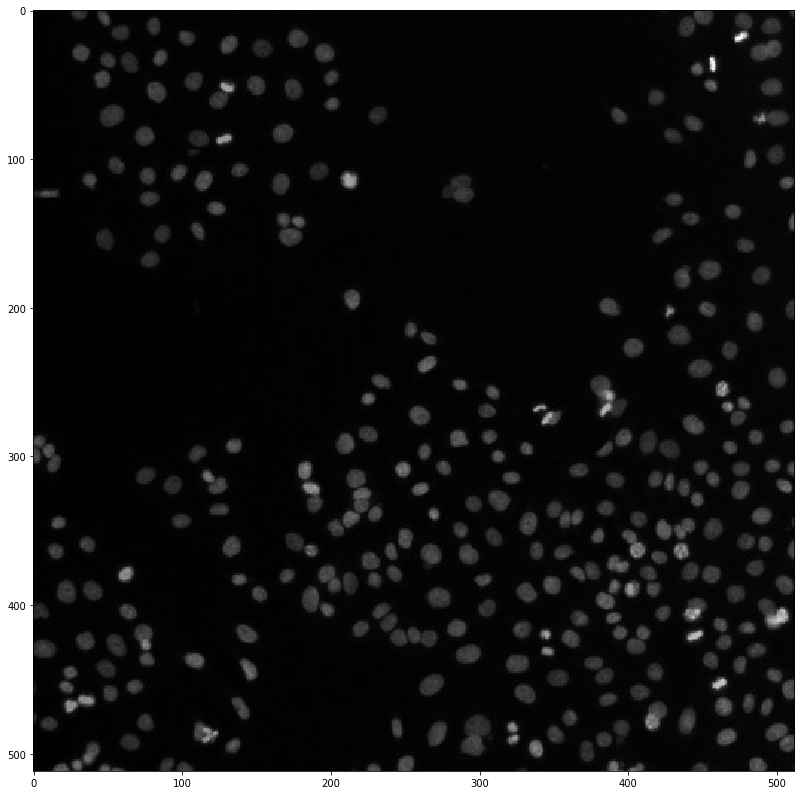

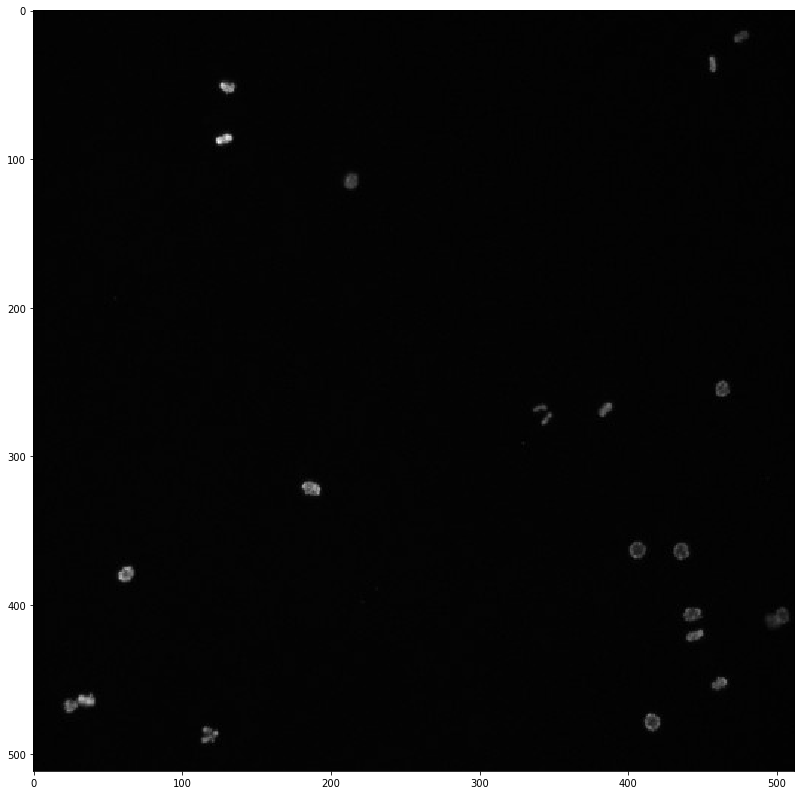

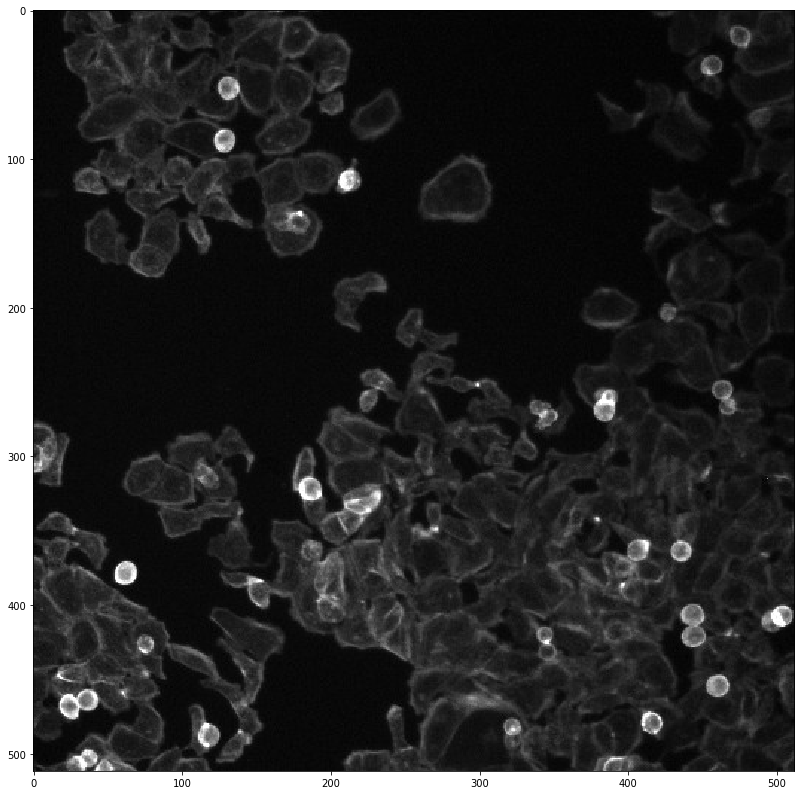

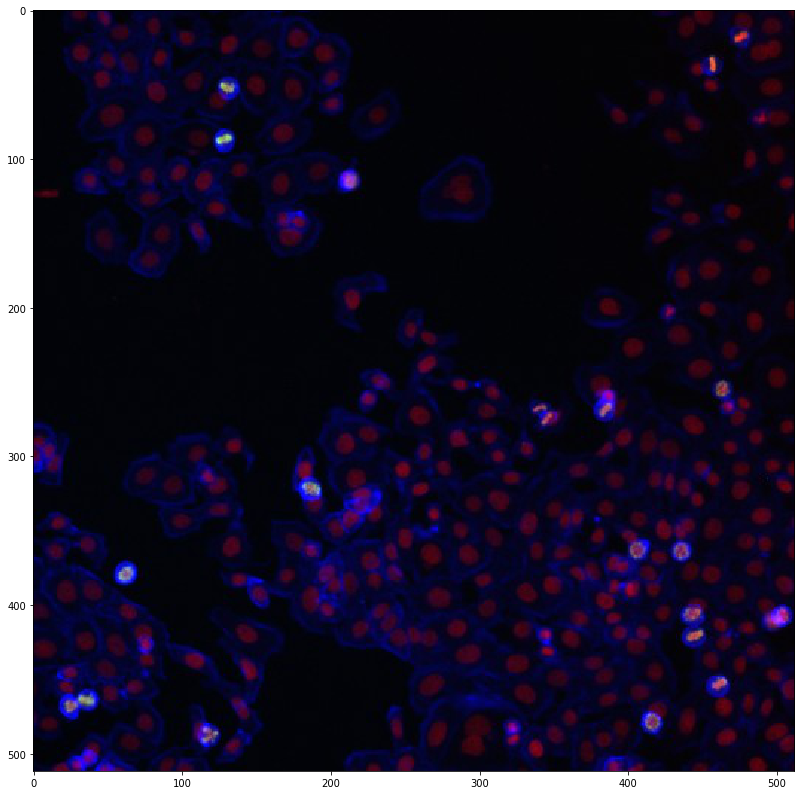

In [5]:
# Import pyplot from matplotlib
from matplotlib import pyplot as plt

# Display the images with the renderImage function.
# Replace the occurences of .. in the code below
dataset_id = 1
dataset = conn.getObject("Dataset", dataset_id)
print "\nImages in Dataset:", dataset.getName()
for image in dataset.listChildren():
    z = 0
    t = 0
    renderedImage = image.renderImage(z,t)
    plt.figure(figsize=[14, 14])
    plt.imshow(renderedImage)
    plt.show()